In [2]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
import json
response_fng = requests.get('https://api.alternative.me/fng/?limit=0&format=json').text
df_fng = pd.DataFrame(json.loads(response_fng)['data'])
df_fng.drop(columns=['time_until_update'],inplace=True)
df_fng.rename(columns={'timestamp':'date'},inplace=True)
df_fng['date'] = df_fng['date'].astype(int).apply(lambda x: datetime.fromtimestamp(x))
df_fng.sort_values('date',inplace=True)
df_fng.set_index('date',inplace=True)
print(f'{len(df_fng)} total records')
df_fng.head()

1560 total records


,value,value_classification
date,,
2018-02-01 01:00:00,30,Fear
2018-02-02 01:00:00,15,Extreme Fear
2018-02-03 01:00:00,40,Fear
2018-02-04 01:00:00,24,Extreme Fear
2018-02-05 01:00:00,11,Extreme Fear


Text(0.5, 1.0, 'Fear and Greed over time')

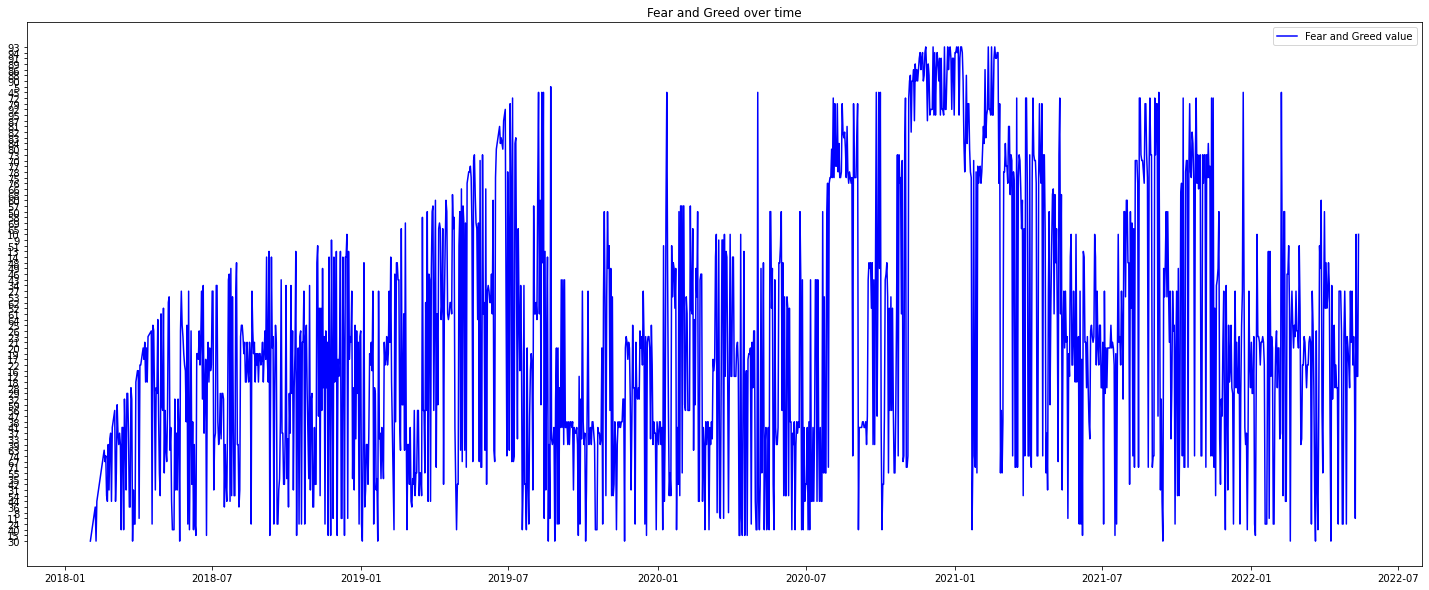

In [4]:
fig, ax1 = plt.subplots(1, 1,figsize=(25,10))
ax1.plot(df_fng['value'],'b',label='Fear and Greed value')
ax1.legend(loc="upper right")
ax1.set_title(f'Fear and Greed over time')
